<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Violence_Analysis_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="50%" src="http://visit.rio/wp-content/uploads/2015/09/6009020497_2e3b557e05_b-1024x678.jpg">

# **Exploratory Analysis of Violence in Rio de Janeiro / Brazil**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes)*

---

**About Rio de Janeiro**

Rio de Janeiro is located in the Southeast Region of Brazil and has an estimated population of 17,366,189 people, according to the [IBGE](https://cidades.ibge.gov.br/brasil/rj/panorama).
Its capital is known as a wonderful city and is one of the most beautiful cities in the world! We are enchanted by its beaches, Pão de Açucar and Christ the Redeemer. Maracanã Stadium is the stage of our football!

Unfortunately, Rio suffers from the same problem as large Brazilian cities: violence! The state saw its crime rates decrease after 2008 and since in several modalities during the years of the UPP - Pacifying Police Unit, which had deep investment cuts in mid-2017 / early 2018.

We will make a brief exploratory analysis of the public security variables in Rio de Janeiro based on the data provided by the [Public Security Institute of the State of Rio de Janeiro](http://www.ispdados.rj.gov.br/Notas.html). Nowadays, much public agency makes its data available to information.
 
---
  

## Data Dictionary

Whenever possible, it is an excellent practice to have a dictionary of variables available for consultation at any stage of the project or to facilitate someone who is reading your script in the future to know the available variables and their meaning.

The data dictionary was obtained from [Public Security Institute of the State of Rio de Janeiro](http://www.ispdados.rj.gov.br/Notas.html).

**Dictionary of variables:**

* **ano:** Year of occurrence reporting
* **mes:** Occurrence reporting month
* **hom_doloso:** Willful murder
* **lesao_corp_morte:** Bodily injury followed by death
* **latrocinio:** Robbery (theft followed by death)
* **hom_por_interv_policial:** Death by the intervention of State agent
* **letalidade_violenta:** Willful homicide + Bodily injury followed by death + Robbery + Death by the intervention of State agent
* **lesao_corp_dolosa:** Willful bodily injury
* **estupro:** In 2009, Article 214 of the Penal Code came to characterize Violent Attempt to Pudor (AVP) as Rape. So, before 2009, the variable "rape" is the sum of "rape" and "AVP".
* **hom_culposo:** Culpable homicide (traffic) / Running over + collision + others
* **lesao_corp_culposa:** Run over + collision + others
* **roubo_comercio:** Theft of commercial premises
* **roubo_residencia:** Robbery of residence
* **roubo_veiculo:** Vehicle theft
* **roubo_carga:** Cargo theft
* **roubo_transeunte:** Theft of passersby
* **roubo_em_coletivo:** Collective theft
* **roubo_banco:** Bank robbery
* **roubo_celular:** Cell phone theft
* **roubo_conducao_saque:** Theft with the victim's driving to loot at a financial institution
* **roubo_apos_saque:** Theft after withdrawing from a financial institution
* **roubo_bicicleta:** Bicycle theft
* **outros_roubos:** Thefts other than those listed above (Includes count of robbery occurrences)
* **total_roubos:** Total thefts (Sum of all thefts listed above)
* **furto_veiculos:** Vehicle theft
* **furto_transeunte:** Passover theft
* **furto_coletivo:** Collective theft
* **furto_celular:** Cell phone theft
* **furto_bicicleta:** Bicycle theft
* **outros_furtos:** Thefts other than those listed above
* **total_furtos:** Total thefts (Sum of all thefts listed above)
* **extorsao:** Extortion 
* **sequestro_relampago:** Extortion with momentary deprivation of liberty (lightning kidnapping)
* **estelionato:** Stardom
* **apreensao_drogas:** drug-apprehension 
* **posse_drogas:** Number of records that have a title related to drug possession
* **trafico_drogas:** Number of records that have a title related to drug trafficking
* **apreensao_drogas_sem_autor:** Number of records that have some title referring to the seizure of drugs without the author
* **recuperacao_veiculos:** Vehicle recovery (Refers to vehicle recovery, not necessarily stolen/stolen during the month, and/or stolen/stolen in the same area)
* **apf:** Flagrant Arrest Record
* **aaapai:** Self-Apprehension of Adolescents for Practice of Infraction Act
* **cmp:** Fulfillment of Arrest Warrant
* **cmba:** Fulfillment of Search and Seizure Warrant
* **ameaca:** Threat
* **pessoas_desaparecidas:** Missing people
* **encontro_cadaver:** corpse found
* **encontro_ossada:** Bones found
* **pol_militares_mortos_serv:** military cops killed in service
* **pol_civis_mortos_serv:** civil cops killed in service
* **indicador_cvli: Indicadores Estratégicos:** Intentional lethal violent crimes (intentional homicide + personal injury followed by death + robbery)
* **indicador_roubo_rua:** Strategic Indicators: Street robbery (Passenger theft + Cell phone theft + Collective theft)
* **indicador_roubo_veic:** Strategic Indicators: Vehicle theft (Copy of the variable vehicle_theft)
* **indicador_roubo_carga:** Strategic Indicators: Cargo theft (Copy of the variable theft_load)
* **registro_ocorrencias:** Occurrence record (Total occurrence records released in the month)
* **fase:** 2 - Consolidated without errata 3 - Consolidated with errata

## Data Collection

In this step, it is interesting that you organize the beginning of your script in two steps:


1.   Import the required libraries.
2.   Import the file to be analyzed.



In [1]:
# Import the required libraries.
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the file to be analyzed.
df = pd.read_csv("http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv", sep=";")

## Initial data visualization

In this step, the goal is:

1.   To know the structure of your dataset.
2.   To work on some processing on the variables. 

This is important to avoid mistakes and biases during the analysis.

Below, we can see that the dataset has variables with empty spaces. In this project we will not focus on how to handle the missing records, so we will replace the empty spaces with NaN for Pandas to count the missing values. We will create a variable called `Data()` to work with times series in the future.

In [3]:
# Show the first five entries
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


In [4]:
# Create a variable data
df['dia'] = "01"
df[['dia']] = df[['dia']].apply(pd.to_numeric)
df['Data'] = df.apply(lambda row: datetime(row['ano'], row['mes'],row['dia']), axis=1)

# replace all emptys with NaN
df = df.replace(r' ', np.nan, regex=True)
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,dia,Data
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3,1,1991-01-01
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,1,1991-02-01
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3,1,1991-03-01
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3,1,1991-04-01
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3,1,1991-05-01


In [5]:
# Eliminate 'dia' column
df = df.drop(['dia'], axis= 1)

In [6]:
## Visualize the dataset columns 
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mor

In [7]:
# identify the data volume
print("Rows:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

# Check the first five dataset entries
display(df.dtypes)

Rows:	 356
Features:	 59



ano                                    int64
mes                                    int64
hom_doloso                             int64
lesao_corp_morte                      object
latrocinio                             int64
hom_por_interv_policial               object
letalidade_violenta                    int64
tentat_hom                             int64
lesao_corp_dolosa                      int64
estupro                               object
hom_culposo                           object
lesao_corp_culposa                    object
roubo_comercio                         int64
roubo_residencia                       int64
roubo_veiculo                          int64
roubo_carga                            int64
roubo_transeunte                       int64
roubo_em_coletivo                      int64
roubo_banco                            int64
roubo_cx_eletronico                   object
roubo_celular                         object
roubo_conducao_saque                  object
roubo_apos

It is interesting to note that some variables have a lot of missing data. Given the big time interval presented in the dataset, we can suggest some hypotheses of what could explain this absence, and how we can get around it to continue exploring the data set.

We have some consolidated data since 1991 when most of the police stations were not digital and the way to collect data was not standard. This explains the fact of a large number of empty in the beginner of our times series.

Unfortunately, when it comes to Brazil, if today we have a data culture that still leaves something to be desired, what can we say about it in the period in question? We must also take into account the format in which these data were recorded at the time. Were they registered correctly and lost during scanning periods? Or has the management of this information always been flawed?

Although we will not focus on this project in dealing with missing data, we will check the proportion of them to the entire dataset.

In [8]:
# Identifying missing data and classifying missing variables from highest to lowest
df.isnull().sum().sort_values(ascending=False)[:25]

furto_bicicleta               276
roubo_bicicleta               276
apf                           180
apreensao_drogas_sem_autor    180
posse_drogas                  180
trafico_drogas                180
cmba                          180
cmp                           180
aaapai                        180
furto_coletivo                144
estupro                       144
roubo_apos_saque              144
extorsao                      144
sequestro_relampago           144
estelionato                   144
roubo_conducao_saque          144
furto_celular                 144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
roubo_cx_eletronico           144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
ameaca                         96
sequestro                      96
dtype: int64

In [9]:
# Identifying missing data percentage and classifying the variables from the highest to the lowest(%)
df.isnull().sum().sort_values(ascending=False)[:25] / df.shape[0]

furto_bicicleta               0.775281
roubo_bicicleta               0.775281
apf                           0.505618
apreensao_drogas_sem_autor    0.505618
posse_drogas                  0.505618
trafico_drogas                0.505618
cmba                          0.505618
cmp                           0.505618
aaapai                        0.505618
furto_coletivo                0.404494
estupro                       0.404494
roubo_apos_saque              0.404494
extorsao                      0.404494
sequestro_relampago           0.404494
estelionato                   0.404494
roubo_conducao_saque          0.404494
furto_celular                 0.404494
pol_militares_mortos_serv     0.404494
pol_civis_mortos_serv         0.404494
roubo_cx_eletronico           0.404494
pessoas_desaparecidas         0.370787
encontro_ossada               0.370787
roubo_celular                 0.303371
ameaca                        0.269663
sequestro                     0.269663
dtype: float64

In [10]:
# This command is another way of viewing the data set. It is possible to identify the shape, the number of non-null records per variable, and the type of variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ano                         356 non-null    int64         
 1   mes                         356 non-null    int64         
 2   hom_doloso                  356 non-null    int64         
 3   lesao_corp_morte            260 non-null    object        
 4   latrocinio                  356 non-null    int64         
 5   hom_por_interv_policial     272 non-null    object        
 6   letalidade_violenta         356 non-null    int64         
 7   tentat_hom                  356 non-null    int64         
 8   lesao_corp_dolosa           356 non-null    int64         
 9   estupro                     212 non-null    object        
 10  hom_culposo                 272 non-null    object        
 11  lesao_corp_culposa          260 non-null    object        

Above, we can see that some of the variables have missing values in considerable proportions, such as the example of crimes related to bicycles and drug seizures. As the data are structured over time, a way to carry out an analysis that is better suited to reality, we can analyze them from the date they started to be registered. In the above command, we observed that several numeric variables are classified as 'object' and we need to convert them to variables classified as 'numeric'.

In [11]:
# Convert object variables to float
df[['lesao_corp_morte', 'hom_por_interv_policial','estupro','hom_culposo','lesao_corp_culposa','roubo_cx_eletronico','roubo_celular',
    'roubo_conducao_saque','roubo_apos_saque','roubo_bicicleta','furto_coletivo','furto_celular','furto_bicicleta','sequestro',
    'extorsao','sequestro_relampago','estelionato','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor','apf','aaapai',
    'cmp','cmba','ameaca','pessoas_desaparecidas','encontro_ossada','pol_militares_mortos_serv','pol_civis_mortos_serv','indicador_cvli','registro_ocorrencias']] = df[['lesao_corp_morte', 'hom_por_interv_policial','estupro','hom_culposo','lesao_corp_culposa','roubo_cx_eletronico','roubo_celular',
    'roubo_conducao_saque','roubo_apos_saque','roubo_bicicleta','furto_coletivo','furto_celular','furto_bicicleta','sequestro',
    'extorsao','sequestro_relampago','estelionato','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor','apf','aaapai',
    'cmp','cmba','ameaca','pessoas_desaparecidas','encontro_ossada','pol_militares_mortos_serv','pol_civis_mortos_serv','indicador_cvli','registro_ocorrencias']].apply(pd.to_numeric)
print(df.dtypes) 

ano                                    int64
mes                                    int64
hom_doloso                             int64
lesao_corp_morte                     float64
latrocinio                             int64
hom_por_interv_policial              float64
letalidade_violenta                    int64
tentat_hom                             int64
lesao_corp_dolosa                      int64
estupro                              float64
hom_culposo                          float64
lesao_corp_culposa                   float64
roubo_comercio                         int64
roubo_residencia                       int64
roubo_veiculo                          int64
roubo_carga                            int64
roubo_transeunte                       int64
roubo_em_coletivo                      int64
roubo_banco                            int64
roubo_cx_eletronico                  float64
roubo_celular                        float64
roubo_conducao_saque                 float64
roubo_apos

## Statistical Summary on Violence in Rio de Janeiro

In this step, we will do a brief statistical evaluation of the data to start with the `describe()` function. It is possible to observe, for example:

* **The elevate standard deviation** for most variables, indicating months with high numbers of records. Are these months a specific period in the historical series that we are analyzing and that no longer reflects reality or our numbers started to get worse after a certain moment?
* **The average** vehicle theft in the period was **2,456 thefts/month** (You could get the average by doing:`df.roubo_veiculo.mean()`)
* **The average** vehicle recovery in the period was **1,771 recoveries/month**(You could get the average by doing:`df.recuperacao_veiculo.mean()`)
* **The minimum value** for intentional homicide was **272** cases in a month while the maximum value in a month was **831** cases! (You could get the average by doing: `df.hom_doloso.min()` and `df.hom_doloso.max()`)


In [12]:
# Statistical Summary
df.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
count,356.000000,356.000000,356.000000,260.000000,356.000000,272.000000,356.000000,356.000000,356.000000,212.000000,272.000000,260.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,212.000000,248.000000,212.000000,212.000000,80.000000,356.000000,356.000000,356.000000,356.000000,212.000000,212.000000,80.000000,356.000000,356.000000,260.000000,212.000000,212.000000,212.000000,356.000000,176.000000,176.000000,176.000000,356.000000,176.000000,176.000000,176.000000,176.000000,260.000000,224.000000,356.000000,224.000000,212.000000,212.000000,260.000000,356.000000,356.000000,356.000000,260.000000,356.000000
mean,2005.337079,6.455056,497.941011,4.296154,15.396067,74.033088,573.039326,320.028090,5455.457865,371.551887,209.720588,3329.542308,449.668539,131.016854,2448.022472,344.848315,3455.168539,666.808989,9.103933,3.632075,989.858871,11.070755,141.910377,11.537500,1220.994382,9511.053371,1655.837079,1505.884831,637.207547,1432.283019,132.312500,6005.514045,10429.362360,0.642308,132.113208,7.849057,2330.452830,1093.429775,616.039773,768.147727,183.142045,1764.671348,2341.068182,557.698864,1253.994318,87.170455,5458.350000,428.464286,64.811798,3.299107,2.051887,0.334906,471.711538,4811.542135,2448.022472,344.848315,53757.938462,2.994382
std,8.577657,3.447915,117.529424,2.732753,5.978166,38.336474,107.165207,126.081437,1515.321549,93.818935,54.364248,854.530349,122.171720,45.341394,784.143419,221.945392,2438.206605,299.782602,10.492003,2.628049,634.208430,6.373798,56.181970,7.665381,790.048549,4557.123516,307.859363,965.391600,271.056812,394.700024,80.447733,1948.000961,3674.459063,0.949974,42.649641,5.031262,878.436306,643.656210,242.302417,304.140251,37.137540,650.738109,636.508553,243.478190,362.637410,69.337390,1146.130858,72.567078,34.783612,2.255993,1.742185,0.635527,94.627728,3199.976923,784.143419,221.945392,11038.867487,0.074848
min,1991.000000,1.000000,255.000000,0.000000,2.000000,10.000000,297.000000,122.000000,2350.000000,188.000000,111.000000,584.000000,169.000000,38.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,305.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,263.000000,1086.000000,1097.000000,59.000000,30621.000000,2.000000
25%,1998.000000,3.000000,403.750000,2.000000,11.000000,43.000000,496.000000,201.750000,4012.750000,284.250000,174.750000,2957.250000,361.750000,100.000000,1883.000000,212.000000,1065.000000,436.000000,2.000000,2.000000,554.750000,6.000000,94.000000,4.000000,819.250000,5208.250000,1418.500000,725.250000,483.250000,1285.500000,83.000000,4012.250000,6705.000000,0.000000,107.000000,5.000000,1695.250000,730.750000,380.250000,465.250000,156.750000,1274.750000,1722.500000,333.750000,947.750000,45.750000,4830.250000,386.000000,40.750000,2.000000,1.000000,0.000000,392.750000,1598.000000,1883.000000,212.000000,45374.500000,3.000000
50%

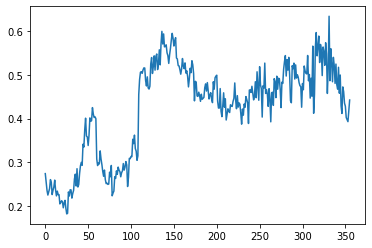

In [13]:
# Create a new variable called `Percentual_Carros_Recuperados(Percentage Car Recovered)` to check the evolution of the vehicle recovery index.
df["Percentual_Carros_Recuperados"] = (df.recuperacao_veiculos / (df.roubo_veiculo + df.furto_veiculos))
df.Percentual_Carros_Recuperados.plot();

It is possible to observe that from the month 150, or the year 2004, the percentage of vehicle recovery has a significant increase in recovery, but, even today, the values vary between 45% and 65% of the recovery.

### Data Visualization

After a brief analysis by the statistical summary using the `describe()`, we’ll work on some views:

* Plot the histogram of all variables for visualization. If you want to evaluate the histogram of a specific variable, use `df.hom_doloso.hist()`.


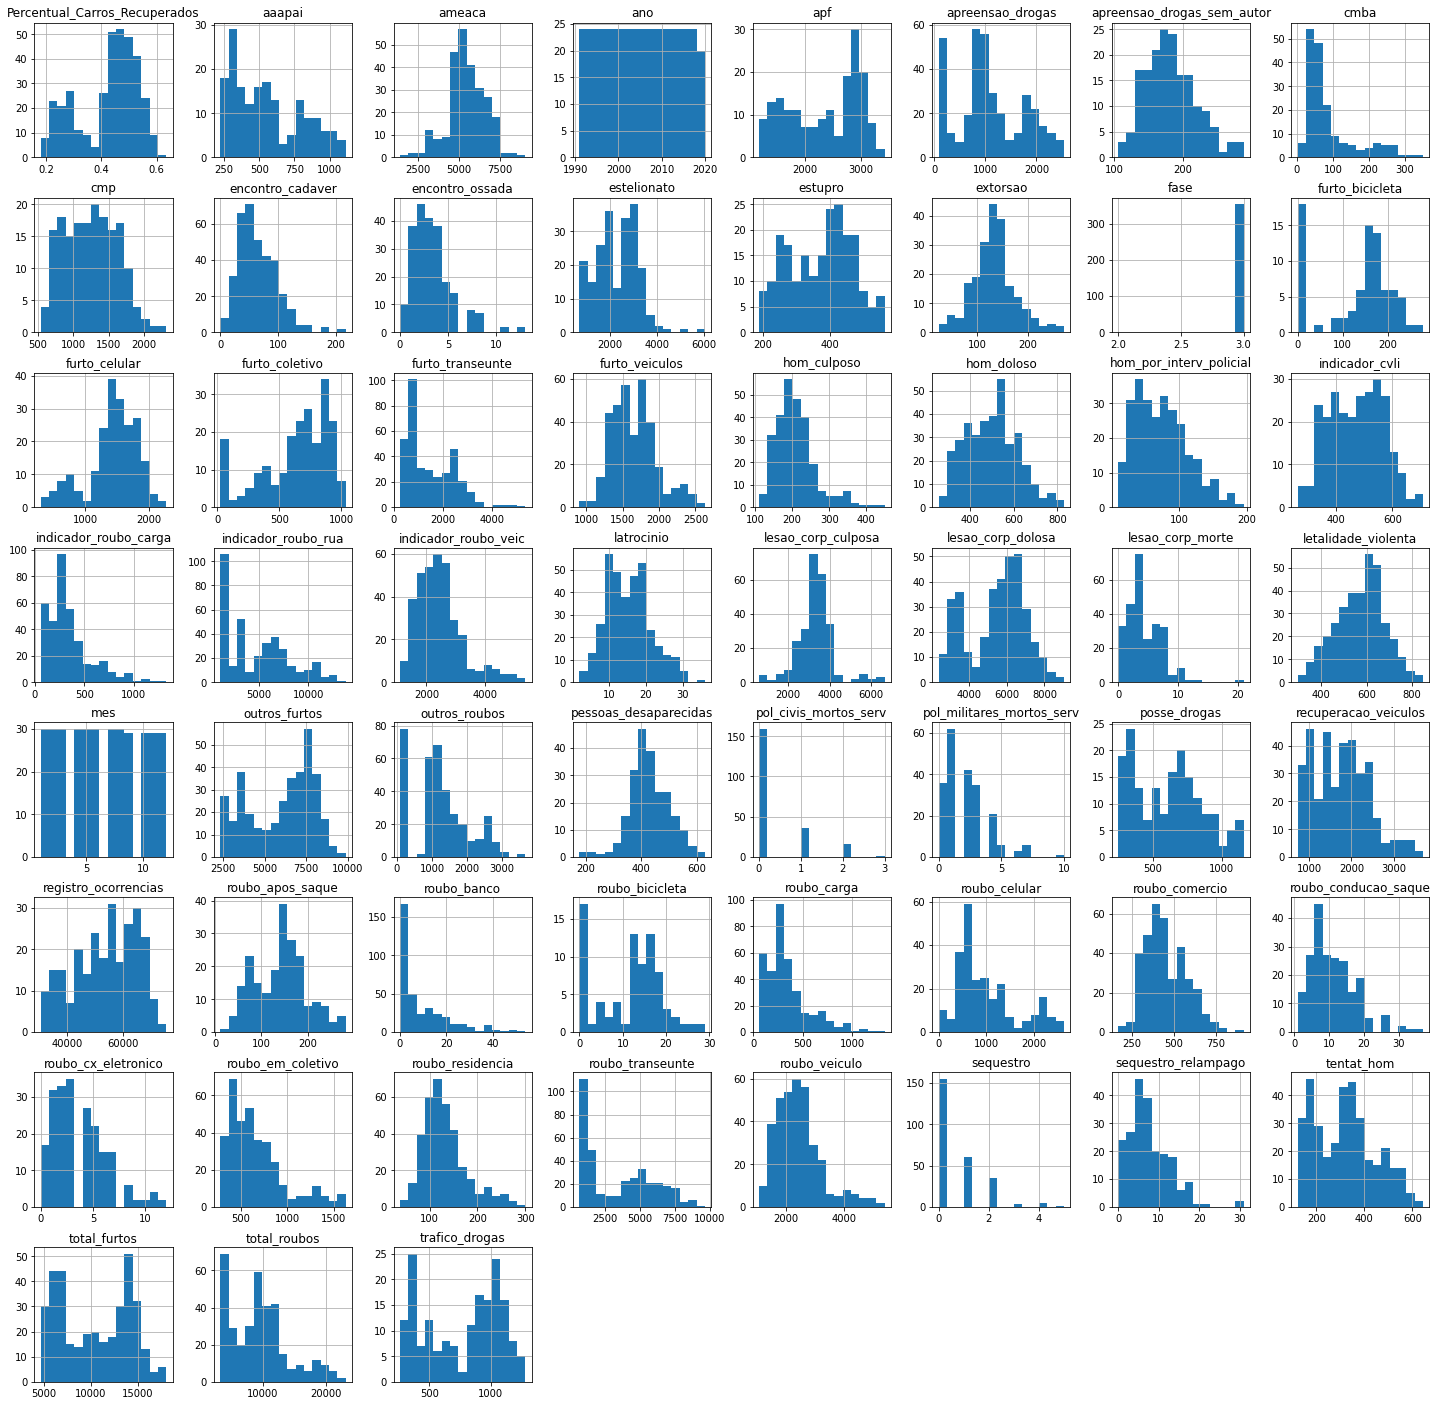

In [14]:
df.hist(bins=15, figsize=(25,25));

In [15]:
# create a correlation matrix
corr = df[['roubo_bicicleta','furto_bicicleta','cmba','cmp','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor','apf','aaapai','sequestro_relampago','estelionato',
           'roubo_conducao_saque','furto_coletivo','roubo_apos_saque','pol_militares_mortos_serv','pol_civis_mortos_serv','furto_celular','roubo_cx_eletronico',
           'estupro','extorsao','pessoas_desaparecidas','encontro_ossada','roubo_celular','registro_ocorrencias','lesao_corp_culposa','sequestro','ameaca','lesao_corp_morte',
           'hom_culposo','hom_por_interv_policial','roubo_comercio','roubo_residencia','letalidade_violenta','lesao_corp_dolosa','tentat_hom','roubo_carga','latrocinio',
           'hom_doloso','roubo_veiculo','roubo_transeunte','roubo_em_coletivo','roubo_banco','outros_roubos','furto_veiculos','furto_transeunte','outros_furtos',
           'apreensao_drogas','recuperacao_veiculos','encontro_cadaver']].corr()
# show the correlation matrix
display(corr)

,roubo_bicicleta,furto_bicicleta,cmba,cmp,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,apf,aaapai,sequestro_relampago,estelionato,roubo_conducao_saque,furto_coletivo,roubo_apos_saque,pol_militares_mortos_serv,pol_civis_mortos_serv,furto_celular,roubo_cx_eletronico,estupro,extorsao,pessoas_desaparecidas,encontro_ossada,roubo_celular,registro_ocorrencias,lesao_corp_culposa,sequestro,ameaca,lesao_corp_morte,hom_culposo,hom_por_interv_policial,roubo_comercio,roubo_residencia,letalidade_violenta,lesao_corp_dolosa,tentat_hom,roubo_carga,latrocinio,hom_doloso,roubo_veiculo,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,furto_veiculos,furto_transeunte,outros_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver
roubo_bicicleta,1.000000,0.837246,0.435376,-0.173594,-0.314259,-0.050741,-0.513876,-0.002218,-0.386165,-0.376886,0.233717,-0.106505,-0.252980,-0.381434,0.030118,0.003420,0.201416,0.081587,-0.148245,-0.120067,-0.225581,0.017458,0.577718,-0.046936,-0.436107,0.162657,-0.431494,0.029178,-0.100285,0.390592,-0.244786,-0.039006,0.099336,-0.379454,-0.264307,0.250531,-0.008281,-0.145829,0.222404,0.054248,0.470558,-0.181170,0.377860,-0.246573,-0.353858,-0.157228,-0.292093,0.097938,-0.340877
furto_bicicleta,0.837246,1.000000,0.649137,-0.139403,-0.427422,-0.111832,-0.604148,0.006117,-0.515508,-0.342567,0.201756,-0.056099,-0.257311,-0.420960,0.074109,0.023746,0.287359,0.107565,-0.089160,-0.169859,-0.299983,0.013569,0.797111,0.046520,-0.470289,0.127911,-0.472015,0.035226,-0.035601,0.585966,-0.227291,-0.016172,0.247943,-0.400951,-0.226002,0.395161,0.009175,-0.101304,0.382879,0.214021,0.704819,-0.232933,0.544701,-0.285477,-0.436160,-0.157604,-0.398828,0.261806,-0.458270
cmba,0.435376,0.649137,1.000000,0.421015,0.306181,0.478245,-0.093195,0.506905,0.093616,0.081446,0.422198,-0.216027,-0.024515,-0.501741,0.109902,-0.113112,-0.088166,0.022620,0.324396,-0.005271,-0.139716,0.038600,0.841183,0.459062,-0.493541,-0.145669,-0.323876,0.045187,-0.384787,0.563933,0.165682,-0.304405,0.012817,-0.386218,0.439372,0.541990,-0.140840,-0.262560,0.590831,0.524289,0.709409,-0.175078,0.691349,-0.410608,-0.266744,-0.016335,0.395450,0.536014,-0.482108
cmp,-0.173594,-0.139403,0.421015,1.000000,0.756454,0.759918,0.493704,0.777624,0.671667,0.346516,0.626999,-0.285328,0.586382,-0.301453,-0.017840,-0.110207,-0.162315,-0.197752,0.644043,0.358608,0.331953,0.202940,0.306390,0.697682,0.140670,-0.131307,0.247050,-0.129109,-0.436577,-0.187304,0.515126,-0.364551,-0.542790,0.014258,0.485070,0.332547,-0.261843,-0.557994,0.179039,0.385977,0.069477,-0.215574,0.212549,-0.499541,0.214295,0.390798,0.787441,0.217875,-0.429900
posse_drogas,-0.314259,-0.427422,0.306181,0.756454,1.000000,0.873745,0.575953,0.849494,0.830346,0.354689,0.698065,-0.397369,0.468573,-0.491878,0.038911,-0.197275,-0.325214,-0.054863,0.635467,0.319006,0.409245,0.092483,0.295080,0.699791,0.013226,-0.165230,0.256080,-0.091710,-0.604046,-0.241217,0.596831,-0.418292,-0.511741,0.076934,0.661473,0.495670,-0.282758,-0.491251,0.253442,0.334634,0.040708,-0.231449,0.180668,-0.545057,0.230390,0.320765,0.964915,0.237038,-0.292964
trafico_drogas,-0.050741,-0.111832,0.478245,0.759918,0.873745,1.000000,0.408024,0.968827,0.815877,0.327609,0.714698,-0.517186,0.388688,-0.684843,0.098183,-0.170021,-0.423719,-0.004505,0.636099,0.243713,0.237723,0.060339,0.526001,0.684742,-0.226528,-0.137056,0.014464,-0.092620,-0.715610,-0.035553,0.586980,-0.507757,-0.442237,-0.173119,0.733269,0.637375,-0.211857,-0.514800,0.437448,0.476957,0.238556,-0.312217,0.450318,-0.688760,0.083089,0.200026,0.968185,0.405421,-0.495861
apreensao_drogas_sem_autor,-0.513876,-0.604148,-0.093195,0.493704,0.575953,0.408024,1.000000,0.383728,0.644400,0.188752,0.206129,0.051578,0.446190,0.055010,0.043350,-0.072130,-0.109040,-0.023337,0.347131,0.320590,0.425459,0.186982,-0.186257,0.449695,0.387039,-0.138402,0.479584,-0.113767,-0.165488,-0.338414,0.519220,0.146468,-0.215969,0.370478,0.318541,0.048921,-0.118045,-0.084653,-0.006952,0.093177,-0.25

### We will analyze three variables in a little more detail
* `hom_doloso`, `roubo_veiculo` e `roubo_em_coletivo` 

### Willful Homicide

Willful homicide occurs when a person intentionally takes the life of the other person or takes the risk of doing so. There are two ways to classify this kind of crime:

*   Intentional homicide: Intentional homicide means killing a human being willfully and illegally. That means the intent was to cause death or serious injury, but not necessarily that it was planned beforehand.
*   Involuntary manslaughter: It occurs when the agent has no intention of committing murder but caused the death of another through recklessness or criminal negligence.

In [16]:
## Summary
mean_hom_doloso = df.hom_doloso.mean()
min_hom_doloso = df.hom_doloso.min()
max_hom_doloso = df.hom_doloso.max()

print('Average Homicide per month: {:.1f}'.format(mean_hom_doloso))
print('What was the lowest result for a month? {:.1f} intentional  Homicides'.format(min_hom_doloso))
print('What was the biggest result for a month? {:.1f} intentional  Homicides'.format(max_hom_doloso))

Average Homicide per month: 497.9
What was the lowest result for a month? 255.0 intentional  Homicides
What was the biggest result for a month? 831.0 intentional  Homicides


It is possible to observe by analyzing the histogram that:

*   There were almost 70 months between 500 to 550 intentional homicides recorded throughout the series studied.
*   There were almost 20 months with records of more than 650 homicides a month.
*   In just over 20 months, homicides were between 250 and 330 months approximately.



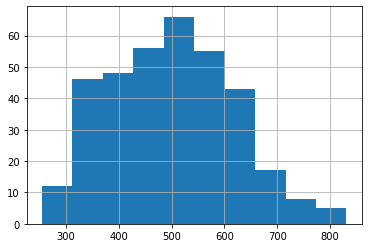

In [17]:
df.hom_doloso.hist();

It is possible to observe from the historical series that this type of crime is reducing over the years. If we compare 2019 with 2018, we have a 19% reduction in the number of registrations. The result with the worst month of intentional homicides occurred in January / 1995 with 831 cases, as shown below. The best month occurred in June / 2015 with 272 cases.

In [18]:
# Check the month with the highest number of intentional homicides
df[df.hom_doloso == 831]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
48,1995,1,831,NaN,17,NaN,848,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,1433,2060,188,NaN,3,1995-01-01,0.360191


In [19]:
# Check the month with the lowest number of intentional homicides
df[df.hom_doloso == 272]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
293,2015,6,272,2.0,16,44.0,334,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,290.0,5936,2254,566,60357.0,3,2015-06-01,0.492891


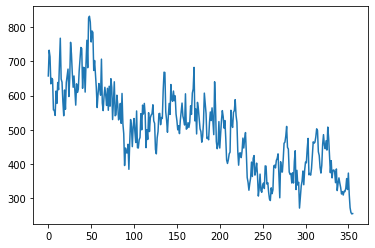

In [20]:
df.hom_doloso.plot()

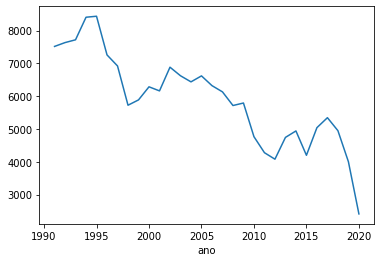

In [21]:
Sum_Hom_Doloso_Ano = df.groupby('ano')['hom_doloso'].sum()
Sum_Hom_Doloso_Ano.plot()

In [22]:
# Sum of thefts in the last 5 years
Sum_Hom_Doloso_Ano.tail()

ano
2016    5042
2017    5346
2018    4950
2019    4004
2020    2413
Name: hom_doloso, dtype: int64

### Vehicle Theft
It's estimated that Rio de Janeiro has a fleet of approximately 4,511,484 cars according to data from the [IBGE](https://cidades.ibge.gov.br/brasil/rj/panorama) in 2018.

In [23]:
## Summary
mean_roubo_veiculo = df.roubo_veiculo.mean()
min_roubo_veiculo = df.roubo_veiculo.min()
max_roubo_veiculo = df.roubo_veiculo.max()

print('Average of vehicle theft per month: {:.1f}'.format(mean_roubo_veiculo))
print('What was the lowest result for a month? {:.1f} vehicle theft'.format(min_roubo_veiculo))
print('What was the biggest result for a month? {:.1f} vehicle theft'.format(max_roubo_veiculo))

Average of vehicle theft per month: 2448.0
What was the lowest result for a month? 1097.0 vehicle theft
What was the biggest result for a month? 5358.0 vehicle theft


It is possible to observe by analyzing the histogram that:

*   There were almost 85 months between 1,900 to 2,700 vehicle thefts recorded throughout the series studied.
*   No month had less than 1000 thefts!

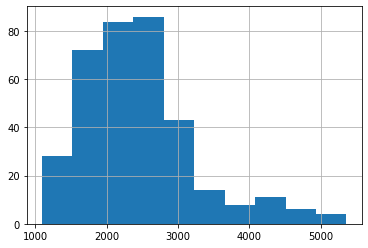

In [24]:
df.roubo_veiculo.hist();

We can observe that this kind of crime was increasing over the years but, since 2017 it has been decreasing. If we compare 2019 with 2018, we have a 23.7% reduction in the number of records. The result with the worst month of vehicle theft happened in March / 2018 with 5358 cases, as shown below. The best month occurred in February / 1991 with 1097 cases.

In [25]:
# Check the month with the highest number of vehicle thefts
df[df.roubo_veiculo == 5358]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
326,2018,3,508,6.0,20,109.0,643,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,534.0,11206,5358,918,66035.0,3,2018-03-01,0.522173


In [26]:
# Check the month with the lowest number of vehicles thefts
df[df.roubo_veiculo == 1097]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,1991-02-01,0.254835


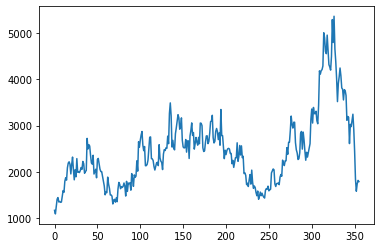

In [27]:
# Number of vehicles thefts by month
df.roubo_veiculo.plot();

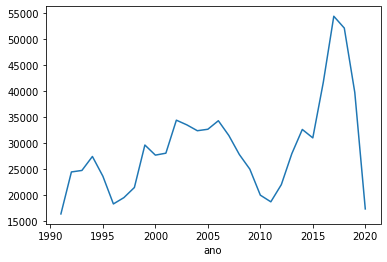

In [28]:
# Number of vehicles thefts by year
Sum_roubo_veiculo_Ano = df.groupby('ano')['roubo_veiculo'].sum()
Sum_roubo_veiculo_Ano.plot()

In [29]:
# Sum of vehicles thefts in the last 5 years
Sum_roubo_veiculo_Ano.tail()

ano
2016    41696
2017    54366
2018    52097
2019    39749
2020    17407
Name: roubo_veiculo, dtype: int64

### Collective theft (Bus)

It is estimated that Rio de Janeiro has an approximate fleet of 44,803 buses according to data from the [IBGE](https://cidades.ibge.gov.br/brasil/rj/panorama) in 2018. Next, we will observe some analysis of this variable:

In [30]:
## Summary
mean_roubo_em_coletivo = df.roubo_em_coletivo.mean()
min_roubo_em_coletivo = df.roubo_em_coletivo.min()
max_roubo_em_coletivo = df.roubo_em_coletivo.max()

print('Average of bus theft per month: {:.1f}'.format(mean_roubo_em_coletivo))
print('What was the lowest result for a month? {:.1f} bus thefts'.format(min_roubo_em_coletivo))
print('What was the biggest result for a month? {:.1f} bus thefts'.format(max_roubo_em_coletivo))

Average of bus theft per month: 666.8
What was the lowest result for a month? 281.0 bus thefts
What was the biggest result for a month? 1628.0 bus thefts


It is possible to observe by analyzing the histogram that:

* There were almost 85 months with 400 to 580 thefts in collectives registered throughout the series studied.
* In 10 months we had numbers over 1500 thefts in collectives.


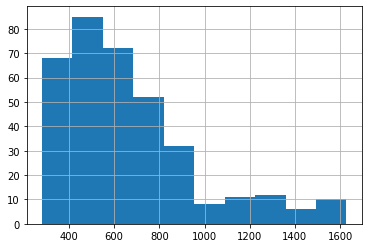

In [31]:
df.roubo_em_coletivo.hist();

It is possible to observe from the historical series that this type of crime is increasing over the years. In the comparison between 2019 and 2018, there was a drop of only 2%. The result with the worst month of collective robberies happened in August / 2017 with 1628 cases, as shown below. The best month occurred in September / 1991 with 281 cases.

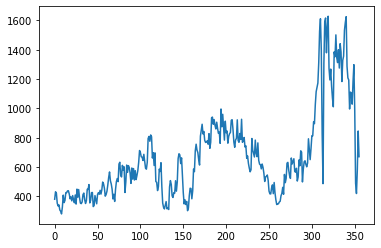

In [32]:
# Number of bus thefts by month
df.roubo_em_coletivo.plot();

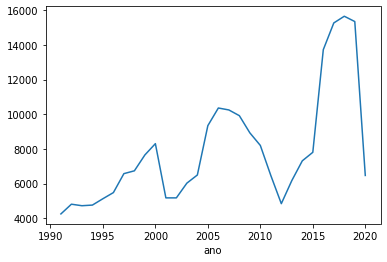

In [33]:
# Number of bus thefts by year
Sum_roubo_em_coletivo_Ano = df.groupby('ano')['roubo_em_coletivo'].sum()
Sum_roubo_em_coletivo_Ano.plot();

In [34]:
# Check the month with the highest number of bus thefts
df[df.roubo_em_coletivo == 1628 ]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
319,2017,8,397,4.0,16,70.0,487,528,5230,433.0,178.0,2576.0,649,111,4613,843,8815,1628,2,1.0,2417.0,6.0,79.0,4.0,2638,21806,1318,1754,757.0,1340.0,183.0,7768,13120,0.0,145.0,11.0,2988.0,1887,725.0,1016.0,182.0,3494,2833.0,623.0,1818.0,222.0,4701.0,420.0,42,5.0,2.0,1.0,417.0,12860,4613,843,70380.0,3,2017-08-01,0.589108


In [35]:
# Check the month with the lowest number of bus thefts
df[df.roubo_em_coletivo == 281]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,Data,Percentual_Carros_Recuperados
8,1991,9,542,NaN,19,NaN,561,146,3026,NaN,NaN,NaN,473,199,1353,91,805,281,12,NaN,NaN,NaN,NaN,NaN,90,3304,1993,810,NaN,NaN,NaN,3460,6263,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,1086,1353,91,NaN,3,1991-09-01,0.225941


In [36]:
# Sum of bus thefts in the last 5 years
Sum_roubo_em_coletivo_Ano.tail()

ano
2016    13731
2017    15273
2018    15660
2019    15354
2020     6469
Name: roubo_em_coletivo, dtype: int64

## Conclusion

This project sought to perform the acquisition of data directly from the public source to explore a brief treatment of the data and its exploitation. Besides that, we use statistical functions to explore the dataset, as well as the creation of new variables to enrich the analyzes. 
Regarding the three variables studied in greater detail, it is observed that during the period of implementation and full operation of the UPPs, there is a drop in numbers continuously and consistently.
However, problems of corruption in the State Government and the weakening of the UPPs in mid-2014/2015 make the scenario before falling, rise again.

*The Pacifying Police Unit (UPP): It has been described as a program for the state to “take back territories” that has long been neglected by public authorities.*